# (07) Rebuttal Fig -- Smoothen degree (```KABA```)

**Motivation**: <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display, Latex

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
# HIDE CODE


def default_props_anesth(
        num_k: int = 7,
        perc: int = 15,
        **kwargs, ):
    mice = Mice(512)
    mice.set_kws(
        desc_ca2='preproc',
        desc_bold='rabies-hp',
    )
    props_base = {
        'mice': mice,
        'num_k': num_k,
        'task': 'rest',
        'perc': f'p{perc}-sample',
        'metric': 'pearson',
        'sv_props': {
            'match_using': 'gam',
            'match_metric': 'euclidean'},
        'graph_type': 'real',
        'kw_kmeans': {'n_init': 100},
        'verbose': False,
    }
    kwargs = setup_kwargs(props_base, kwargs)
    props_ca = {'mode': 'ca2', **kwargs}
    return mice, props_ca

## Prep

In [3]:
mice = Mice(512)
mice.setup_func_data()

bs = Base(mice, mode='ca2')
kws_show = show_kws(7)
pal = prepare_palette()
translation = {'BOLD': BOLD, 'CAS': CAS, 'CAF': CAF}

fig_dir = pjoin(fig_base_dir, 'rebuttal')
print(fig_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/rebuttal

## Create/save degree ranks for sigma smoothed ca

In [4]:
d = np.load(
    pjoin(tmp_dir, 'degrees.npy'),
    allow_pickle=True,
).item()

sigmas = [2, 4, 8, 12, 16]

In [5]:
%%time

b = (0.01, 0.5)
for sig in sigmas:
    desc = f"sig{sig:0.0f}"
    mice.set_kws(desc_ca2=desc, band_ca2=b)
    deg = collect_degrees_lite(
        mice=mice,
        mode='ca2',
        rho=0.15,
        filter_isolated=True,
    )
    if not len(deg):
        continue
    deg = np.stack(list(
        deg.values()))
    d[sig] = bn.nanmean(deg, 0)

CPU times: user 2min 14s, sys: 7.27 s, total: 2min 21s
Wall time: 2min 21s


### Plot degree

In [6]:
{k: (np.nanmin(v), np.nanmax(v)) for k, v in d.items()}

{
    'BOLD': (42.44736842105263, 123.64545454545454),
    'CAS': (14.851063829787234, 161.45045045045046),
    'CAF': (1.5, 196.04504504504504),
    2: (11.115384615384615, 153.16216216216216),
    4: (25.061728395061728, 141.8918918918919),
    8: (24.96875, 126.28828828828829),
    12: (25.25, 117.95495495495496),
    16: (26.15625, 114.009009009009)
}

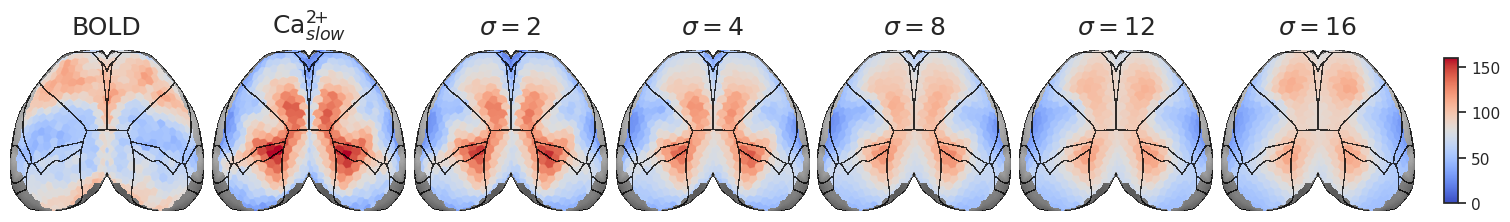

In [7]:
fig, _ = bs.show(
    data=np.stack([
        v for k, v in d.items()
        if k != 'CAF']),
    titles=[
        translation[k]
        if isinstance(k, str)
        else r"$\sigma = $" + str(k)
        for k in d if k != 'CAF'],
    figsize=(15, 2.1), vmin=0, vmax=160, 
    label_fontsize=18, title_y=1.05,
    cbar_shrink=0.9, cbar_pad=0.15,
    cbar=True, cbar_aspect=10,
    cmap='coolwarm', contour_cmap='Greys_r',
    layout='constrained',
    display=False,
)
# sup = fig.suptitle(f"Degrees", fontsize=17, y=1.5)
fig.savefig(
    pjoin(fig_dir, 'Fig_Rebuttal_Degree.png'),
    # bbox_extra_artists=[sup],
    bbox_inches='tight',
    dpi=600,
)
display(fig)

### With FWHM in the title

In [8]:
def FWHM(s):
    return 2 * np.sqrt(2 * np.log(2)) * s * 50 / 1000

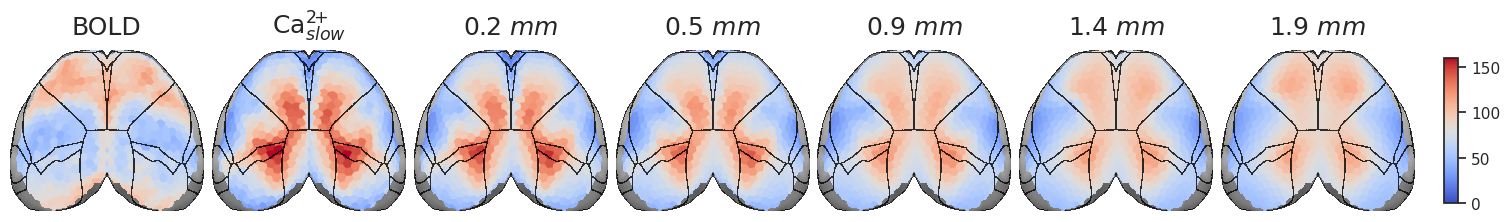

In [9]:
fig, _ = bs.show(
    data=np.stack([
        v for k, v in d.items()
        if k != 'CAF']),
    titles=[
        translation[k]
        if isinstance(k, str)
        else f"{FWHM(k):0.1f} $mm$"
        for k in d if k != 'CAF'],
    figsize=(15, 2.1), vmin=0, vmax=160, 
    label_fontsize=18, title_y=1.05,
    cbar_shrink=0.9, cbar_pad=0.15,
    cbar=True, cbar_aspect=10,
    cmap='coolwarm', contour_cmap='Greys_r',
    layout='constrained',
    display=False,
)
# sup = fig.suptitle(f"Degrees", fontsize=17, y=1.5)
fig.savefig(
    pjoin(fig_dir, 'Fig_Rebuttal_Degree_FWHM.png'),
    # bbox_extra_artists=[sup],
    bbox_inches='tight',
    dpi=600,
)
display(fig)